In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# cd(change directory) : 작업 경로 변경
%cd /content/drive/MyDrive/ColabNotebooks/deep

/content/drive/MyDrive/ColabNotebooks/deep


In [5]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
%cd /content/drive/MyDrive/ColabNotebooks/deep/yolov5
!pip install -r requirements.txt

/content/drive/MyDrive/ColabNotebooks/deep/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# cat : 파일의 모든 내용을 출력
%cat /content/drive/MyDrive/ColabNotebooks/deep/dataset/data.yaml

# train,val(test로 바꿔도 상관없음) 각각의 데이터들이 있는 경로 설정
# nc(number of classes) : 클래스 종류의 개수
# names : 해당 클래스들의 이름

names:
- bed
- blanket
- carpet
- chair
- curtain
- door
- lamp
- pillow
- shelves
- sofa
- table
nc: 11
roboflow:
  license: CC BY 4.0
  project: yesese
  url: https://universe.roboflow.com/yi-1ryjw/yesese/dataset/2
  version: 2
  workspace: yi-1ryjw
test: /content/drive/MyDrive/ColabNotebooks/deep/dataset/test.txt
train: /content/drive/MyDrive/ColabNotebooks/deep/dataset/train.txt
val: /content/drive/MyDrive/ColabNotebooks/deep/dataset/val.txt


In [8]:
# glob : 많은 파일들을 다룰 때 사용하는 라이브러리
from glob import glob
# 해당 경로의 모든 파일명을 리스트로 만들어줌
train_list =glob('/content/drive/MyDrive/ColabNotebooks/deep/dataset/train/images/*.jpg')
test_list =glob('/content/drive/MyDrive/ColabNotebooks/deep/dataset/test/images/*.jpg')
val_list =glob('/content/drive/MyDrive/ColabNotebooks/deep/dataset/valid/images/*.jpg')
#len(img_list)

In [9]:
#모든 이미지들의 경로들을 하나의 txt파일에 담아주기(train,val 따로)
# with open : 파일에 접근(없는 파일명이라면 새롭게 생성됨)
# w:읽기 쓰기 가능 ,r :읽기 전용
with open('/content/drive/MyDrive/ColabNotebooks/deep/dataset/train.txt','w') as f:
  f.write('\n'.join(train_list)+'\n')
with open('/content/drive/MyDrive/ColabNotebooks/deep/dataset/test.txt','w') as f:
  f.write('\n'.join(test_list)+'\n')
with open('/content/drive/MyDrive/ColabNotebooks/deep/dataset/val.txt','w') as f:
  f.write('\n'.join(val_list)+'\n')

In [10]:
import yaml
with open('/content/drive/MyDrive/ColabNotebooks/deep/dataset/data.yaml','r') as f:
  data=yaml.safe_load(f)
data
# 딕셔너리 형태로 출력

{'names': ['bed',
  'blanket',
  'carpet',
  'chair',
  'curtain',
  'door',
  'lamp',
  'pillow',
  'shelves',
  'sofa',
  'table'],
 'nc': 11,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'yesese',
  'url': 'https://universe.roboflow.com/yi-1ryjw/yesese/dataset/2',
  'version': 2,
  'workspace': 'yi-1ryjw'},
 'test': '/content/drive/MyDrive/ColabNotebooks/deep/dataset/test.txt',
 'train': '/content/drive/MyDrive/ColabNotebooks/deep/dataset/train.txt',
 'val': '/content/drive/MyDrive/ColabNotebooks/deep/dataset/val.txt'}

In [11]:
# 딕셔너리의 value 값 변경하기
data['train'] = '/content/drive/MyDrive/ColabNotebooks/deep/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/ColabNotebooks/deep/dataset/val.txt'
data['test'] = '/content/drive/MyDrive/ColabNotebooks/deep/dataset/test.txt'

data

{'names': ['bed',
  'blanket',
  'carpet',
  'chair',
  'curtain',
  'door',
  'lamp',
  'pillow',
  'shelves',
  'sofa',
  'table'],
 'nc': 11,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'yesese',
  'url': 'https://universe.roboflow.com/yi-1ryjw/yesese/dataset/2',
  'version': 2,
  'workspace': 'yi-1ryjw'},
 'test': '/content/drive/MyDrive/ColabNotebooks/deep/dataset/test.txt',
 'train': '/content/drive/MyDrive/ColabNotebooks/deep/dataset/train.txt',
 'val': '/content/drive/MyDrive/ColabNotebooks/deep/dataset/val.txt'}

In [12]:
with open('/content/drive/MyDrive/ColabNotebooks/deep/dataset/data.yaml', 'w') as f:
  # yaml.dump(data,f) : yaml파일에서 data의 값을 f에 덮어씌워주기
  yaml.dump(data,f)

In [13]:
%cd /content/drive/MyDrive/ColabNotebooks/deep/yolov5

/content/drive/MyDrive/ColabNotebooks/deep/yolov5


In [ ]:
!python ./segment/train.py --img 720 --batch 16 --epochs 150 --data /content/drive/MyDrive/ColabNotebooks/deep/dataset/data.yaml --cfg /content/drive/MyDrive/ColabNotebooks/deep/yolov5/models/segment/yolov5n-seg.yaml --weights yolov5n-seg.pt --name last_n

segment/train: weights=yolov5n-seg.pt, cfg=/content/drive/MyDrive/ColabNotebooks/deep/yolov5/models/segment/yolov5n-seg.yaml, data=/content/drive/MyDrive/ColabNotebooks/deep/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=last_n, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, c

In [ ]:
val_img = val_list[18]
print(val_img)

/content/drive/MyDrive/ColabNotebooks/deep/dataset/valid/images/140_png.rf.c0bc2eb5f3e156547112b0efb1f0fefc.jpg


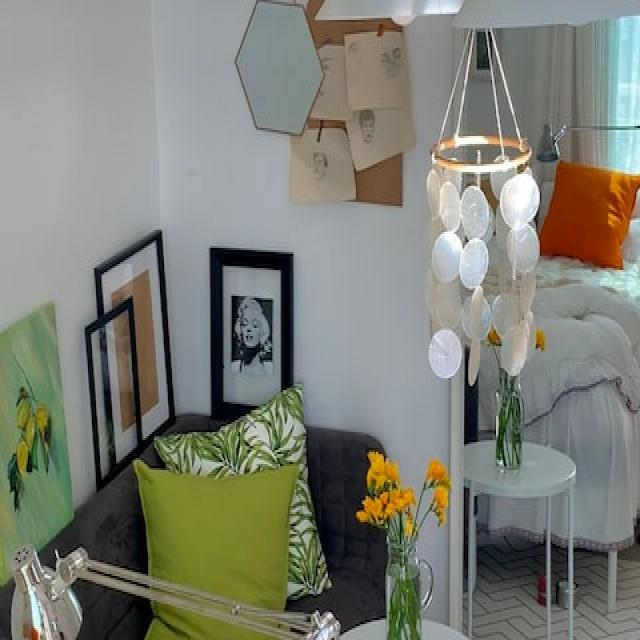

In [ ]:
from IPython.display import Image
Image(val_img)

In [ ]:
!python segment/predict.py --weights /content/drive/MyDrive/ColabNotebooks/deep/yolov5/runs/train-seg/last_n/weights/best.pt --img 736 --conf 0.2 --source "{val_img}" --retina-masks --save-txt
# detect.py : 객체 검출용 코드 집합
# --weights : 학습시킨 가중치중 가장 최고의 값으로 불러오기
# --conf : 출력시켜줄 이미지의 confidence 기준값(모델이 객체에 박스를 쳐줄때 얼만큼 신뢰하는지에 대한 지표)
# --source: 판단에 사용할 데이터의 경로

segment/predict: weights=['/content/drive/MyDrive/ColabNotebooks/deep/yolov5/runs/train-seg/last_n/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/deep/dataset/valid/images/140_png.rf.c0bc2eb5f3e156547112b0efb1f0fefc.jpg, data=data/coco128.yaml, imgsz=[736, 736], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=True
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5n-seg summary: 165 layers, 1893280 parameters, 0 gradients, 6.8 GFLOPs
image 1/1 /content/drive/MyDrive/ColabNotebooks/deep/dataset/valid/images/140_png.rf.c0bc2eb5f3e156547112b0efb1f0fefc.jpg: 736x736 1 bed, 1 blanket, 3 carpets, 2